In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
%matplotlib inline

## Thermodynamic definitions in the FES model
We start by importing the ```thermo``` module from the ```prefur``` package.

In [2]:
from prefur import thermo

Next we produce an instance of the ```FES``` class, for which we only need the protein sequence length. 

In [3]:
FES = thermo.FES(65)

We then use functions for producing the thermodynamic functions as a function of the model order parameter $n$.

In [4]:
FES.gen_entropy()
FES.gen_enthalpy()
FES.gen_heatcap()

/Users/daviddesancho/Research/code/PREFUR/prefur/thermo.py:125: RuntimeWarning: divide by zero encountered in log
  self.DSconf = nres*(-R*(nat*np.log(nat) + (1.-nat)*np.log(1-nat)) + (1-nat)*DSres)
/Users/daviddesancho/Research/code/PREFUR/prefur/thermo.py:125: RuntimeWarning: invalid value encountered in multiply
  self.DSconf = nres*(-R*(nat*np.log(nat) + (1.-nat)*np.log(1-nat)) + (1-nat)*DSres)


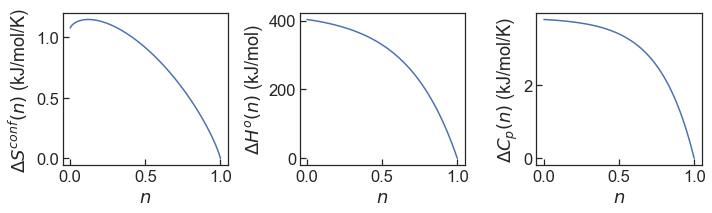

In [5]:
fig, ax = plt.subplots(1,3, figsize=(10,3.))
ax[0].plot(FES.nat, FES.DSconf)
ax[1].plot(FES.nat, FES.DHo)
ax[2].plot(FES.nat, FES.DCp)
ax[0].set_xlabel("$n$")
ax[1].set_xlabel("$n$")
ax[2].set_xlabel("$n$")
ax[0].set_ylabel('$\Delta S^{conf}(n)$ (kJ/mol/K)')
ax[1].set_ylabel('$\Delta H^{o}(n)$ (kJ/mol)')
ax[2].set_ylabel('$\Delta C_p(n)$ (kJ/mol/K)')
plt.tight_layout()

Using the thermodynamic functions above we can generate free energy profiles at any target temperature.

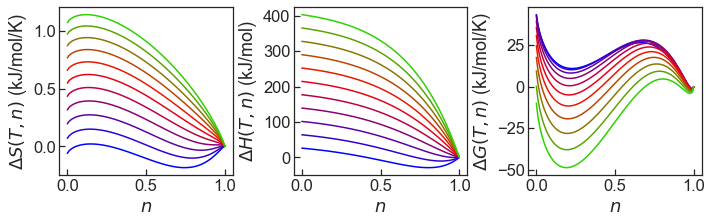

In [6]:
fig, ax = plt.subplots(1,3, figsize=(10,3.2))
for i, t in enumerate(range(285,390,10)):
    FES.gen_free(temp=t)
#ax[0].plot(FES.nat, FES.DSconf)
#ax[0].plot(FES.nat, FES.DHo)
    ax[0].plot(FES.nat, FES.DS, color=plt.cm.brg(i/11.))
    ax[1].plot(FES.nat, FES.DH, color=plt.cm.brg(i/11.))
    ax[2].plot(FES.nat, FES.DG, \
               color=plt.cm.brg(i/11.))
ax[0].set_xlabel("$n$")
ax[1].set_xlabel("$n$")
ax[2].set_xlabel("$n$")
ax[0].set_ylabel('$\Delta S(T, n)$ (kJ/mol/K)')
ax[1].set_ylabel('$\Delta H(T, n)$ (kJ/mol)')
ax[2].set_ylabel('$\Delta G(T, n)$ (kJ/mol/K)')
plt.tight_layout(w_pad=0)

Additionally, we can introduce chemical denaturation effects at any target temperature by incorporating denaturating an empirical functional form $m$.

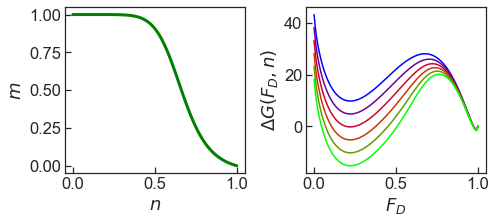

In [7]:
fig, ax = plt.subplots(1,2, figsize=(7,3.2))

denaturant = range(0,30,5)
for i,d in enumerate(denaturant):
    FES.denature(d)
    ax[1].plot(FES.nat, FES.DGdenat, color=plt.cm.brg(i/5.))
ax[0].plot(FES.nat, FES.mdenat, color='green', lw=3)
ax[0].set_xlabel("$n$")
ax[1].set_xlabel("$F_D$")
ax[0].set_ylabel('$m$', fontsize=18)
ax[1].set_ylabel('$\Delta G(F_D,n)$', fontsize=18)

plt.tight_layout()

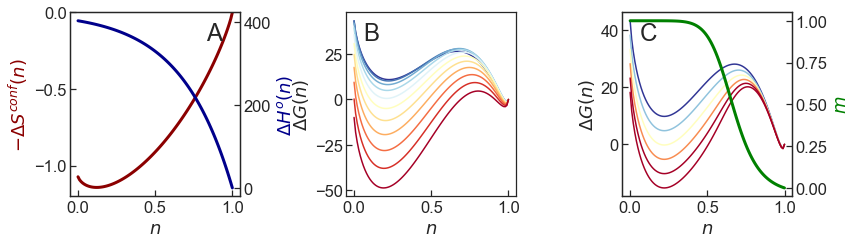

In [8]:
fig, ax = plt.subplots(1,3, figsize=(12,3.5))

ax[0].plot(FES.nat, -FES.DSconf, c='darkred', lw=3)
axalt1 = ax[0].twinx()
axalt1.plot(FES.nat, FES.DHo, c='darkblue', lw=3)
for i, t in enumerate(range(285,390,10)):
    FES.gen_free(temp=t)
    ax[1].plot(FES.nat, FES.DG, \
               color=plt.cm.RdYlBu_r(i/10.))

axalt2 = ax[2].twinx()
for i in range(0,30,5):
    FES.denature(i)
    ax[2].plot(FES.nat, FES.DGdenat, color=plt.cm.RdYlBu_r(i/20.))
axalt2.plot(FES.nat, FES.mdenat, color='green', lw=3)
    
ax[0].set_xlabel("$n$", fontsize=18)
ax[1].set_xlabel("$n$", fontsize=18)
ax[2].set_xlabel("$n$", fontsize=18)

ax[0].set_ylabel('$-\Delta S^{conf}(n)$', fontsize=18) 
ax[1].set_ylabel('$\Delta G(n)$', fontsize=18)
axalt1.set_ylabel('$\Delta H^{o}(n)$', fontsize=18)
axalt2.set_ylabel('$m$', fontsize=18)
ax[2].set_ylabel('$\Delta G(n)$', fontsize=18)

ax[0].yaxis.label.set_color('darkred')
axalt1.yaxis.label.set_color('darkblue')
axalt2.yaxis.label.set_color('green')

ax[0].set_ylim(-1.2,0)
ax[0].set_yticks(np.arange(-1,0.2,0.5))
ax[0].set_xticks(np.arange(0,1.2,0.5))
ax[1].set_xticks(np.arange(0,1.2,0.5))
ax[2].set_xticks(np.arange(0,1.2,0.5))
axalt1.set_yticks(range(0,500,200))


ax[0].annotate("A", xy=(0.8, 0.85), fontsize=24, xycoords=ax[0].get_window_extent)
ax[1].annotate("B", xy=(0.1, 0.85), fontsize=24, xycoords=ax[1].get_window_extent)
ax[2].annotate("C", xy=(0.1, 0.85), fontsize=24, xycoords=ax[2].get_window_extent)

plt.tight_layout(w_pad=-0.4)
#fig.savefig("thermo_fun.png", dpi=300)

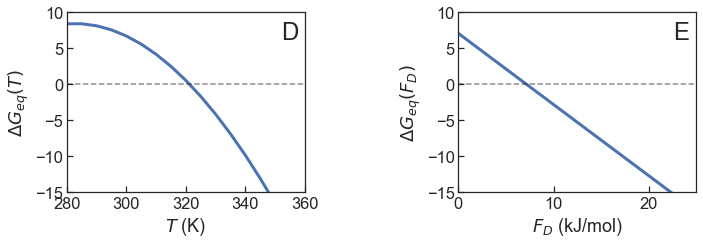

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10,3.5))

temps = range(280,390,5)
pf = []
pu = []
DGeqT = []
for i, t in enumerate(temps):
    FES.gen_free(temp=t)
    a,b,c = thermo.stability(FES.nat, FES.DG)
    pf.append(a)
    pu.append(b)
    DGeqT.append(c)
ax[0].plot(temps, DGeqT, '-', lw=3)
#axalt0 = ax[0].twinx()
#axalt0.plot(temps, pf, temps, pu)

denat = range(0,30,2)
pf = []
pu = []
DGeqD = []
for i in denat:
    FES.denature(i)
    a,b,c = thermo.stability(FES.nat, FES.DGdenat)
    pf.append(a)
    pu.append(b)   
    DGeqD.append(c)
ax[1].plot(denat, DGeqD, '-', lw=3)
#axalt1 = ax[1].twinx()
#axalt1.plot(denat, pf, denat, pu)

ax[0].set_xlim(280,360)
ax[1].set_xlim(0,25)
ax[0].set_xticks(range(280,370,20))
ax[0].set_ylim(-15,10)
ax[1].set_ylim(-15,10)
ax[0].axhline(0, 0, 500, ls='dashed', c='k', alpha=0.5)
ax[1].axhline(0, 0, 30, ls='dashed', c='k', alpha=0.5)
ax[0].set_ylabel('$\Delta G_{eq}(T)$', fontsize=18) 
ax[0].set_xlabel('$T$ (K)', fontsize=18) 
ax[1].set_ylabel('$\Delta G_{eq}(F_D)$', fontsize=18)
ax[1].set_xlabel('$F_D$ (kJ/mol)', fontsize=18) 

ax[0].annotate("D", xy=(0.9, 0.85), fontsize=24, xycoords=ax[0].get_window_extent)
ax[1].annotate("E", xy=(0.9, 0.85), fontsize=24, xycoords=ax[1].get_window_extent)

plt.tight_layout(w_pad=8)
#fig.savefig("thermo_free.png", dpi=300)